## Loading Python modules

In [1]:
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import sqlite3 as sqldatabase
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Retrieving data

In [2]:
dfDonations = pd.read_csv("donations.csv", index_col=0, header=0, thousands=',')
dfDonations.head(5)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
nationbuilder_id,,,,,,,,,,,,,,,,
1,Donation,$125.00,Credit Card,541,1/8/2020 12:41,NaN,NaN,Markham,Ontario,L3P,Canada,CA,True,True,Chris Thompson,"Black Fund Signatory,defundpolicesurvey,Genera..."
10,Donation,$25.00,Credit Card,5509,5/11/2020 22:10,annual_membership_fee,NaN,St-Hubert,Quebec,J4T,Canada,CA,True,True,NaN,"FR,General Member,newsletter,Ontario,Paid Memb..."
100,Donation,$15.00,Credit Card,6039,6/1/2020 16:53,general_donation,NaN,Ottawa,Ontario,K1G,Canada,CA,NaN,True,Chris Thompson,donor
1000,Donation,$15.00,Credit Card,7233,6/11/2020 17:30,general_donation,NaN,Orillia,ON,L3V,Canada,CA,NaN,True,NaN,"donor,Elder Prospects,General Member,Non - bla..."
1001,Donation,$100.00,Credit Card,7234,6/11/2020 17:38,general_donation,NaN,Mississauga,Ontario,L5G,Canada,CA,True,True,NaN,donor


In [3]:
dfDonations.shape[0]

1594

In [4]:
columns = dfDonations.columns
columns

Index(['type', 'amount', 'payment_type_name', 'donor_id', 'donation_date',
       'donation_type', 'recurring_donation_status', 'billing_city',
       'billing_state', 'billing_FSA', 'billing_country',
       'billing_country_code', 'signup_email_opt_in', 'signup_mobile_opt_in',
       'signup_point_person_name_or_email', 'signup_tag_list'],
      dtype='object')

## Preliminary EDA

In [5]:
dfDonations.dtypes

type                                 object
amount                               object
payment_type_name                    object
donor_id                              int64
donation_date                        object
donation_type                        object
recurring_donation_status            object
billing_city                         object
billing_state                        object
billing_FSA                          object
billing_country                      object
billing_country_code                 object
signup_email_opt_in                  object
signup_mobile_opt_in                 object
signup_point_person_name_or_email    object
signup_tag_list                      object
dtype: object

In [6]:
dfDonations.isnull().sum()

type                                    0
amount                                  0
payment_type_name                       0
donor_id                                0
donation_date                           0
donation_type                           1
recurring_donation_status            1181
billing_city                            0
billing_state                          35
billing_FSA                             0
billing_country                         0
billing_country_code                    0
signup_email_opt_in                   568
signup_mobile_opt_in                   11
signup_point_person_name_or_email    1055
signup_tag_list                        19
dtype: int64

In [7]:
# Turning amounts into numbers.
dfDonations["amount"] = dfDonations["amount"].replace({r'\$':''}, regex = True)
dfDonations["amount"]

nationbuilder_id
1       125.00 
10       25.00 
100      15.00 
1000     15.00 
1001    100.00 
         ...   
995      25.00 
996      74.15 
997     500.00 
998      25.00 
999      50.00 
Name: amount, Length: 1594, dtype: object

In [8]:
def is_number(x):    
    try:
        float(x)
    except ValueError:
        return False
    else:
        return True

dfDonations[ ~dfDonations["amount"].apply(is_number) ]

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
nationbuilder_id,,,,,,,,,,,,,,,,
1002,Donation,"1,000.00",Credit Card,7236,6/11/2020 18:54,general_donation,NaN,Burnaby,BC,V5V,Canada,CA,NaN,True,NaN,donor
1057,Donation,"2,000.00",Credit Card,7350,6/15/2020 17:32,general_donation,NaN,Okotoks,Alberta,T1S,Canada,CA,True,True,NaN,donor
106,Donation,"1,000.00",Credit Card,6046,6/1/2020 17:41,general_donation,NaN,Toronto,Ontario,M5V,Canada,CA,True,True,Chris Thompson,donor
1104,Donation,"1,200.00",Credit Card,7533,6/25/2020 21:52,general_donation,NaN,Toronto,Ontario,M5R,Canada,CA,True,True,NaN,donor
1115,Donation,"2,200.00",Credit Card,7558,6/29/2020 15:24,general_donation,NaN,Brampton,Ontario,L7A,Canada,CA,True,True,NaN,donor
1180,Donation,"2,000.00",Credit Card,7666,7/13/2020 16:28,general_donation,NaN,Oshawa,Ontario,L1J,Canada,CA,True,True,NaN,donor
1196,Donation,"1,688.46",Credit Card,7714,7/27/2020 13:02,general_donation,NaN,Toronto,Ontario,M4W,Canada,CA,True,True,NaN,donor
1203,Donation,"1,310.00",Credit Card,7727,7/29/2020 14:38,general_donation,NaN,Saint Laurent,Quebec,H4T,Canada,CA,NaN,True,NaN,donor
132,Donation,"1,500.00",Credit Card,6081,6/1/2020 23:49,general_donation,NaN,Vancouver,BC,V5T,Canada,CA,True,True,Chris Thompson,donor


In [9]:
dfDonations["amount"] = dfDonations["amount"].str.replace(',', '').astype(float)

In [10]:
dfDonations["amount"].describe()

count    1594.000000
mean       69.636468
std       215.649679
min         0.500000
25%        25.000000
50%        25.000000
75%        50.000000
max      5000.000000
Name: amount, dtype: float64

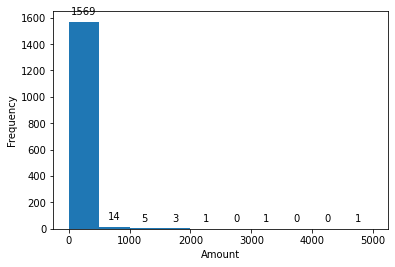

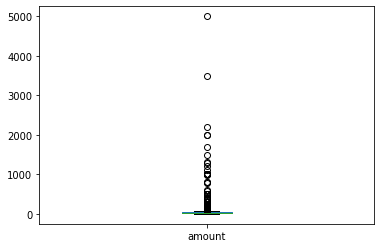

In [11]:
# Amount distribution.
Amt = dfDonations["amount"]

def plot_dist(Amt):
  fig, ax = plt.subplots()
  ax.hist(Amt, density=False)

  for rect in ax.patches:
      height = rect.get_height()
      ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                  xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 
  plt.xlabel("Amount")
  plt.ylabel("Frequency")
  plt.show()

  Amt.plot.box()
  plt.show()

plot_dist(Amt)

In [12]:
normaltest(dfDonations["amount"])

NormaltestResult(statistic=2913.1881559041867, pvalue=0.0)

In [13]:
# We can tell from graphs and stats that the donation amounts are not normal distributed and majority of the donations are below $1000.

In [14]:
# We are creating a dataframe that would contain the smaller values to get a better understanding of how the majority of donations are distributed.
# Beucase the value of donations are not normal distributed, there are no outliers
# However, we will remove the extremely large donation values that are 3 std away from the mean
donation_threshold = dfDonations['amount'].mean() + 3 * dfDonations['amount'].std()
dfDonations[dfDonations['amount'] >= donation_threshold]

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
nationbuilder_id,,,,,,,,,,,,,,,,
1002,Donation,1000.00,Credit Card,7236,6/11/2020 18:54,general_donation,NaN,Burnaby,BC,V5V,Canada,CA,NaN,True,NaN,donor
1057,Donation,2000.00,Credit Card,7350,6/15/2020 17:32,general_donation,NaN,Okotoks,Alberta,T1S,Canada,CA,True,True,NaN,donor
106,Donation,1000.00,Credit Card,6046,6/1/2020 17:41,general_donation,NaN,Toronto,Ontario,M5V,Canada,CA,True,True,Chris Thompson,donor
1104,Donation,1200.00,Credit Card,7533,6/25/2020 21:52,general_donation,NaN,Toronto,Ontario,M5R,Canada,CA,True,True,NaN,donor
1115,Donation,2200.00,Credit Card,7558,6/29/2020 15:24,general_donation,NaN,Brampton,Ontario,L7A,Canada,CA,True,True,NaN,donor
1180,Donation,2000.00,Credit Card,7666,7/13/2020 16:28,general_donation,NaN,Oshawa,Ontario,L1J,Canada,CA,True,True,NaN,donor
1193,Donation,782.00,Credit Card,7699,7/22/2020 15:12,general_donation,NaN,Vancouver,BC,V6M,Canada,CA,NaN,True,NaN,donor
1196,Donation,1688.46,Credit Card,7714,7/27/2020 13:02,general_donation,NaN,Toronto,Ontario,M4W,Canada,CA,True,True,NaN,donor
1203,Donation,1310.00,Credit Card,7727,7/29/2020 14:38,general_donation,NaN,Saint Laurent,Quebec,H4T,Canada,CA,NaN,True,NaN,donor


In [15]:
donationsNoOutliers = dfDonations[dfDonations['amount'] < donation_threshold]
donationsNoOutliers.head(5)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
nationbuilder_id,,,,,,,,,,,,,,,,
1,Donation,125.0,Credit Card,541,1/8/2020 12:41,NaN,NaN,Markham,Ontario,L3P,Canada,CA,True,True,Chris Thompson,"Black Fund Signatory,defundpolicesurvey,Genera..."
10,Donation,25.0,Credit Card,5509,5/11/2020 22:10,annual_membership_fee,NaN,St-Hubert,Quebec,J4T,Canada,CA,True,True,NaN,"FR,General Member,newsletter,Ontario,Paid Memb..."
100,Donation,15.0,Credit Card,6039,6/1/2020 16:53,general_donation,NaN,Ottawa,Ontario,K1G,Canada,CA,NaN,True,Chris Thompson,donor
1000,Donation,15.0,Credit Card,7233,6/11/2020 17:30,general_donation,NaN,Orillia,ON,L3V,Canada,CA,NaN,True,NaN,"donor,Elder Prospects,General Member,Non - bla..."
1001,Donation,100.0,Credit Card,7234,6/11/2020 17:38,general_donation,NaN,Mississauga,Ontario,L5G,Canada,CA,True,True,NaN,donor


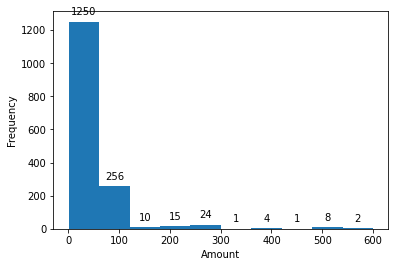

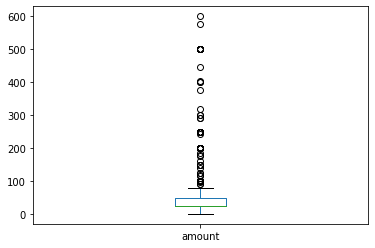

In [16]:
# Amount distribution.
Amt = donationsNoOutliers["amount"]

plot_dist(Amt)

In [17]:
# Looking at the distribution after removing the extremely high values, we can see that most donations are less than $200 in value.
# Because of this, we will directly remove any values higher than $200 to take get a better understanding of donation values

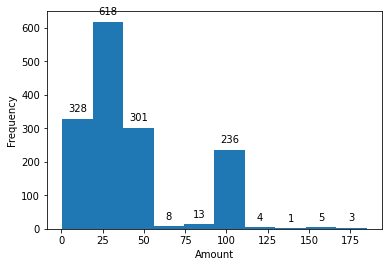

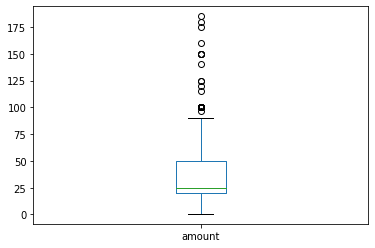

In [18]:
twoHundredDonations = dfDonations[dfDonations['amount'] < 200] 
Amt = twoHundredDonations["amount"]

plot_dist(Amt)

In [19]:
Amt.describe()

count    1517.000000
mean       39.772142
std        31.678353
min         0.500000
25%        20.200000
50%        25.000000
75%        50.000000
max       185.000000
Name: amount, dtype: float64

In [20]:
# From the results above, we can see that there seems to be a particular pattern, two value ranges that hold the most amount of donations.
# The vast amount of donations are less than $50 in value, while there is another influx of donations in the $100 range
# What is interesting is that between these two ranges, from $50-$100, there is very little amounts being donated.
# This could be a behavior pattern, where people tend to donate in even amounts, and in increments that are not too small. 
# “Might as well donate $100 if i am going to donate $80, it is a nice even number"

In [21]:
# With data without outliers, we are able to predict future donation amounts better. However, we can look into the outliers later to study if large donations comes in 
# specific time period, specific region or donors with specific demographics. Hope to get a better understanding with large donations and hopefully find a way to continue 
# to receive large donations.

In [22]:
# Identifying one-time donor and recurring donors.
DonorId = dfDonations.donor_id.value_counts()
dfRec = dfDonations[dfDonations["recurring_donation_status"].notnull()]
dfRec.head(5)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
nationbuilder_id,,,,,,,,,,,,,,,,
1006,Donation,25.0,Credit Card,5711,6/12/2020 2:48,annual_membership_fee,canceled,Laval,QC,H7G,Canada,CA,True,True,NaN,General Member
1015,Donation,5.0,Credit Card,7252,6/12/2020 14:17,general_donation,canceled,Mississauga,Ontario,L5H,Canada,CA,NaN,True,NaN,donor
1016,Donation,10.0,Credit Card,7253,6/12/2020 14:30,general_donation,active,Hubbards,NS,B0J,Canada,CA,True,True,NaN,donor
1031,Donation,10.0,Credit Card,7278,6/13/2020 16:21,general_donation,canceled,Toronto,ON,M6H,Canada,CA,NaN,True,NaN,donor
1034,Donation,100.0,Credit Card,7282,6/13/2020 17:23,general_donation,active,Vancouver,NaN,V6Z,Canada,CA,True,True,NaN,donor


In [23]:
dfRec["amount"].describe()

count    413.000000
mean      21.590799
std       20.987505
min        3.000000
25%       10.000000
50%       25.000000
75%       25.000000
max      100.000000
Name: amount, dtype: float64

In [24]:
dfOne = dfDonations[dfDonations["recurring_donation_status"].isnull()]
dfOne.head(5)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
nationbuilder_id,,,,,,,,,,,,,,,,
1,Donation,125.0,Credit Card,541,1/8/2020 12:41,NaN,NaN,Markham,Ontario,L3P,Canada,CA,True,True,Chris Thompson,"Black Fund Signatory,defundpolicesurvey,Genera..."
10,Donation,25.0,Credit Card,5509,5/11/2020 22:10,annual_membership_fee,NaN,St-Hubert,Quebec,J4T,Canada,CA,True,True,NaN,"FR,General Member,newsletter,Ontario,Paid Memb..."
100,Donation,15.0,Credit Card,6039,6/1/2020 16:53,general_donation,NaN,Ottawa,Ontario,K1G,Canada,CA,NaN,True,Chris Thompson,donor
1000,Donation,15.0,Credit Card,7233,6/11/2020 17:30,general_donation,NaN,Orillia,ON,L3V,Canada,CA,NaN,True,NaN,"donor,Elder Prospects,General Member,Non - bla..."
1001,Donation,100.0,Credit Card,7234,6/11/2020 17:38,general_donation,NaN,Mississauga,Ontario,L5G,Canada,CA,True,True,NaN,donor


In [25]:
dfOne["amount"].describe()

count    1181.000000
mean       86.438213
std       248.066911
min         0.500000
25%        25.000000
50%        50.000000
75%       100.000000
max      5000.000000
Name: amount, dtype: float64

## Recurring Donors & Non-Recurring Ones

In [26]:
print("Number of donations made by recurring donors: ", dfRec.shape[0])
print("Number of donations made by one-time donors: ", dfOne.shape[0])

Number of donations made by recurring donors:  413
Number of donations made by one-time donors:  1181


In [27]:
# However, we found out that there are some non-recurring donors who donated more than once.
DonorId = dfOne.donor_id.value_counts()
dfNonRec = dfOne[dfOne.donor_id.isin(DonorId.index[DonorId.gt(1)])]
dfNotRec = dfNonRec.sort_values(by="donor_id")
dfNotRec

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
nationbuilder_id,,,,,,,,,,,,,,,,
119,Donation,50.0,Credit Card,6063,6/1/2020 20:50,general_donation,NaN,Montreal,QC,H3C,Canada,CA,True,True,Chris Thompson,donor
1432,Donation,100.0,Credit Card,6063,12/26/2020 14:24,general_donation,NaN,Philadelphia,PA,191,United States,US,True,True,Chris Thompson,donor
358,Donation,25.0,Credit Card,6273,6/2/2020 17:53,general_donation,NaN,Ottawa,Ontario,K1Y,Canada,CA,True,True,Chris Thompson,donor
283,Donation,25.0,Credit Card,6273,6/2/2020 14:53,general_donation,NaN,Ottawa,ON,K1R,Canada,CA,True,True,Chris Thompson,donor
333,Donation,125.0,Credit Card,6328,6/2/2020 16:56,general_donation,NaN,Windsor,Ontario,N8P,Canada,CA,NaN,True,Chris Thompson,donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,Donation,15.0,Credit Card,7657,7/10/2020 21:15,general_donation,NaN,Conception Bay South,Newfoundland and Labrador,A1W,Canada,CA,True,True,NaN,donor
1192,Donation,10.0,Credit Card,7694,7/21/2020 18:12,general_donation,NaN,Trois-Rivières,QC,G9B,Canada,CA,True,True,NaN,donor
1191,Donation,10.0,Credit Card,7694,7/21/2020 18:07,general_donation,NaN,Trois-Rivières,QC,G9B,Canada,CA,True,True,NaN,donor


In [28]:
dfOneNotNoDup = dfNotRec.drop_duplicates(subset=['donor_id'], keep='first')
print("Total number of non-recurring donors who donated more than once: ", dfOneNotNoDup.shape[0])

Total number of non-recurring donors who donated more than once:  24


In [29]:
# Creating a dataset without duplicated donor ids.
dfDonationsNoDup = dfDonations.drop_duplicates(subset=['donor_id'], keep='first')
dfDonationsNoDup.head(5)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
nationbuilder_id,,,,,,,,,,,,,,,,
1,Donation,125.0,Credit Card,541,1/8/2020 12:41,NaN,NaN,Markham,Ontario,L3P,Canada,CA,True,True,Chris Thompson,"Black Fund Signatory,defundpolicesurvey,Genera..."
10,Donation,25.0,Credit Card,5509,5/11/2020 22:10,annual_membership_fee,NaN,St-Hubert,Quebec,J4T,Canada,CA,True,True,NaN,"FR,General Member,newsletter,Ontario,Paid Memb..."
100,Donation,15.0,Credit Card,6039,6/1/2020 16:53,general_donation,NaN,Ottawa,Ontario,K1G,Canada,CA,NaN,True,Chris Thompson,donor
1000,Donation,15.0,Credit Card,7233,6/11/2020 17:30,general_donation,NaN,Orillia,ON,L3V,Canada,CA,NaN,True,NaN,"donor,Elder Prospects,General Member,Non - bla..."
1001,Donation,100.0,Credit Card,7234,6/11/2020 17:38,general_donation,NaN,Mississauga,Ontario,L5G,Canada,CA,True,True,NaN,donor


In [30]:
dfDonationsNoDup['billing_state'].unique()

array(['Ontario', 'Quebec', 'ON', 'BC', 'QC', 'Qc', 'Alberta',
       'Quebec, Canada', 'Quebec ', 'NS', 'Qu', 'Québec', nan,
       'British Columbia', 'British Colombia', 'Bc', 'OR', 'Ontario ',
       'Ab', 'AB', 'YT', 'MB', 'NS ', 'QUEBEC', 'sk', 'NL', 'QC - Quebec',
       'Saskatchewan', 'On', 'FL', 'NB', 'Ab ', 'Nova Scotia ',
       'British Columbia ', 'Newfoundland and Labrador', 'MA', 'qc',
       'CA-Quebec', 'bc', 'Aylmer', 'GA', 'CA', 'WA', 'MN', 'Nova Scotia',
       'Ont', 'New Brunswick', 'Newfoundland', 'Province', 'Québec ',
       'Canada', 'Manitoba', 'V7P2H5', 'NY', 'SK', 'Alberta ',
       'ON - Ontario', 'RI', 'ontario', 'ONTARIO', 'Saskatchewan ',
       'alberta', 'QC ', 'AB - Alberta', 'AB ', 'Western Australia',
       'BC ', 'Vancouver', 'CA|-_-|QC', 'PE', 'CA-AB',
       'BC - British Columbia', 'on', 'quebec', 'B.C.', 'Sk ', 'ONT',
       'KY', 'British columbia', 'Newfoundland &amp; Labrador', 'Sk'],
      dtype=object)

In [31]:
dfRecNoDup = dfDonationsNoDup[dfDonationsNoDup["recurring_donation_status"].notnull()]
dfRecNoDup.head(5)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
nationbuilder_id,,,,,,,,,,,,,,,,
1006,Donation,25.0,Credit Card,5711,6/12/2020 2:48,annual_membership_fee,canceled,Laval,QC,H7G,Canada,CA,True,True,NaN,General Member
1015,Donation,5.0,Credit Card,7252,6/12/2020 14:17,general_donation,canceled,Mississauga,Ontario,L5H,Canada,CA,NaN,True,NaN,donor
1016,Donation,10.0,Credit Card,7253,6/12/2020 14:30,general_donation,active,Hubbards,NS,B0J,Canada,CA,True,True,NaN,donor
1031,Donation,10.0,Credit Card,7278,6/13/2020 16:21,general_donation,canceled,Toronto,ON,M6H,Canada,CA,NaN,True,NaN,donor
1034,Donation,100.0,Credit Card,7282,6/13/2020 17:23,general_donation,active,Vancouver,NaN,V6Z,Canada,CA,True,True,NaN,donor


In [32]:
dfOneNoDup = dfDonationsNoDup[dfDonationsNoDup["recurring_donation_status"].isnull()]
dfOneNoDup.head(5)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
nationbuilder_id,,,,,,,,,,,,,,,,
1,Donation,125.0,Credit Card,541,1/8/2020 12:41,NaN,NaN,Markham,Ontario,L3P,Canada,CA,True,True,Chris Thompson,"Black Fund Signatory,defundpolicesurvey,Genera..."
10,Donation,25.0,Credit Card,5509,5/11/2020 22:10,annual_membership_fee,NaN,St-Hubert,Quebec,J4T,Canada,CA,True,True,NaN,"FR,General Member,newsletter,Ontario,Paid Memb..."
100,Donation,15.0,Credit Card,6039,6/1/2020 16:53,general_donation,NaN,Ottawa,Ontario,K1G,Canada,CA,NaN,True,Chris Thompson,donor
1000,Donation,15.0,Credit Card,7233,6/11/2020 17:30,general_donation,NaN,Orillia,ON,L3V,Canada,CA,NaN,True,NaN,"donor,Elder Prospects,General Member,Non - bla..."
1001,Donation,100.0,Credit Card,7234,6/11/2020 17:38,general_donation,NaN,Mississauga,Ontario,L5G,Canada,CA,True,True,NaN,donor


In [33]:
print("Total number of donors: ", dfDonationsNoDup.shape[0])
print("Total number of recurring donors: ", dfRecNoDup.shape[0])
print("Total number of one-time donors: ", dfOneNoDup.shape[0])

Total number of donors:  1180
Total number of recurring donors:  40
Total number of one-time donors:  1140


In [34]:
GroupId = dfDonations.groupby("donor_id")
DonorId = GroupId.count()
DonorId.sort_values(by="type", ascending=False)

,type,amount,payment_type_name,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
donor_id,,,,,,,,,,,,,,,
5806,15,15,15,15,15,14,15,15,15,15,15,15,15,15,15
6641,15,15,15,15,15,14,15,15,15,15,15,0,15,0,15
5710,15,15,15,15,15,14,15,15,15,15,15,15,15,0,15
6137,14,14,14,14,14,14,14,14,14,14,14,14,14,0,14
6942,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6436,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
6435,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
6434,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [35]:
dfMerge = pd.merge(dfDonations, DonorId["type"], on='donor_id')
dfMerge.sort_values(by="type_y", ascending=False).head(5)

,type_x,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list,type_y
430,Donation,25.0,Credit Card,5806,1/2/2021 14:07,general_donation,active,Ottawa,ON,K1K,Canada,CA,True,True,Chris Thompson,donor,15
95,Donation,25.0,Credit Card,5710,6/14/2020 9:50,general_donation,active,Montreal,QC,H1N,Canada,CA,True,True,NaN,"defundpolicesurvey,donor,General Member,Quebec...",15
105,Donation,25.0,Credit Card,5710,2/14/2021 8:51,general_donation,active,Montreal,QC,H1N,Canada,CA,True,True,NaN,"defundpolicesurvey,donor,General Member,Quebec...",15
104,Donation,25.0,Credit Card,5710,5/14/2020 8:50,general_donation,active,Montreal,QC,H1N,Canada,CA,True,True,NaN,"defundpolicesurvey,donor,General Member,Quebec...",15
103,Donation,25.0,Credit Card,5710,1/14/2021 8:51,general_donation,active,Montreal,QC,H1N,Canada,CA,True,True,NaN,"defundpolicesurvey,donor,General Member,Quebec...",15


### Correlation Interaction & Value

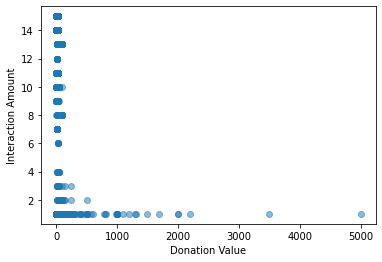

In [36]:
plt.scatter(dfMerge["amount"], dfMerge["type_y"], alpha=0.5)
plt.xlabel("Donation Value")
plt.ylabel("Interaction Amount")
plt.show()

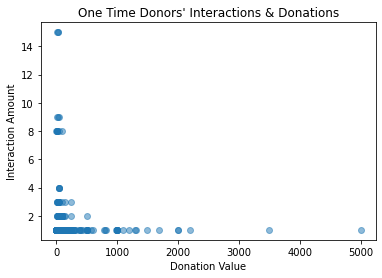

In [37]:
dfMergeOne = dfMerge[dfMerge["recurring_donation_status"].isnull()]
plt.scatter(dfMergeOne["amount"], dfMergeOne["type_y"], alpha=0.5)
plt.xlabel("Donation Value")
plt.ylabel("Interaction Amount")
plt.title("One Time Donors' Interactions & Donations")
plt.show()

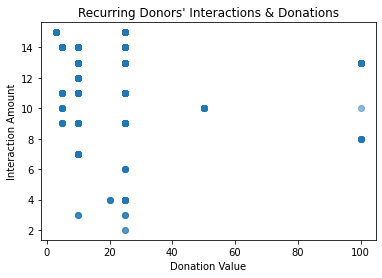

In [38]:
dfMergeRec = dfMerge[dfMerge["recurring_donation_status"].notnull()]
plt.scatter(dfMergeRec["amount"], dfMergeRec["type_y"], alpha=0.5)
plt.xlabel("Donation Value")
plt.ylabel("Interaction Amount")
plt.title("Recurring Donors' Interactions & Donations")
plt.show()

In [39]:
dfMerge[["amount","type_y"]].corr("kendall")

,amount,type_y
amount,1.000000,-0.351083
type_y,-0.351083,1.000000


In [40]:
# The graph and stats suggests that higher interaction might not associate with higher donation values, oppositely, majority of 
# the higher value donations comes from one-time donors.

## Donation Demographics

### Donation Cities

In [41]:
dfDonationsNoDup["billing_city"].unique()

array(['Markham', 'St-Hubert', 'Ottawa', 'Orillia', 'Mississauga',
       'Burnaby', 'Montreal', 'Toronto', 'Laval', 'Ddo', 'Westmount',
       'Stratford', 'Edmonton', 'Montreal ', 'Westmount ', 'Hubbards',
       'Vanier', 'Hampstead', 'Calgary', 'Saint-Zotique', 'quebec',
       'Vancouver', 'toronto', 'Caledon', 'Oshawa', 'Brossard',
       'Gatineau', 'Abbotsford', 'Kelowna', 'Victoria', 'St. Catharines',
       'Eugene', 'North York', 'Windsor', 'Sherwood Park', 'Sarnia',
       'Okotoks', 'Whitehorse', 'st-laurent', 'Wainwright', 'Longueuil',
       'Kitchener', 'Oakville', 'Winnipeg', 'Montréal', 'Belleville',
       'Pierrefonds', 'Burnaby ', 'St margarets bay ', 'Waterloo',
       'Coquitlam', 'Carman', 'St-Eustache', 'København K', 'Surrey',
       'West Pennant', 'montreal', 'Orleans', 'Regina', 'North Bay',
       'Brampton', 'Newmarket', 'Cbs', 'Mississauga, ON', 'Keene',
       'Schumacher', 'West Vancouver', 'Kanata', 'Emerald Park', 'Guelph',
       'Port Williams', 'L

In [42]:
groupCity = dfDonationsNoDup.groupby("billing_city")
DonorCity = groupCity.count()
DonorCity.sort_values(by="donor_id", ascending=False)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
billing_city,,,,,,,,,,,,,,,
Toronto,142,142,142,142,142,142,5,141,142,142,142,80,140,62,141
Ottawa,109,109,109,109,109,109,4,108,109,109,109,64,108,50,109
Calgary,63,63,63,63,63,63,1,62,63,63,63,36,63,28,63
Edmonton,63,63,63,63,63,63,0,63,63,63,63,26,63,33,63
Vancouver,50,50,50,50,50,50,3,48,50,50,50,32,50,17,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lansdowne,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1
Lasalle,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1
Leamington,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1


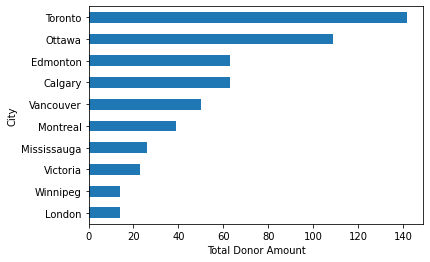

In [43]:
DonorCount = DonorCity["type"].sort_values(ascending=False).head(10)
DonorCount.sort_values(ascending=True).plot.barh()
plt.ylabel("City")
plt.xlabel("Total Donor Amount")
plt.show()

In [44]:
DonorCount

billing_city
Toronto        142
Ottawa         109
Calgary         63
Edmonton        63
Vancouver       50
Montreal        39
Mississauga     26
Victoria        23
London          14
Winnipeg        14
Name: type, dtype: int64

In [45]:
# The top 10 cities ranked according to the total amount of donations received
cityAmountSum = dfDonations[['amount', 'billing_city']].groupby("billing_city").sum()
cityAmountSum.sort_values(by="amount", ascending=False).head(10)

,amount
billing_city,
Toronto,15957.49
Ottawa,9538.00
Vancouver,7547.00
Mississauga,6807.15
Redwood City,5000.00
Edmonton,4602.40
Calgary,3903.13
Montreal,3072.00
Brampton,2530.00


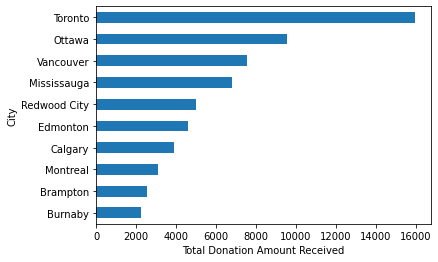

In [46]:
CityCount = cityAmountSum.sort_values(by="amount", ascending=False).head(10)
CityCount["amount"].sort_values(ascending=True).plot.barh()
plt.ylabel("City")
plt.xlabel("Total Donation Amount Received")
plt.show()

In [47]:
# The top 10 cities ranked according to the average amount of donations received
cityAmountAvg = dfDonations[['amount', 'billing_city']].groupby('billing_city').mean()
cityAmountAvg.sort_values(by="amount", ascending=False).head(10)

,amount
billing_city,
Redwood City,5000.0
Okotoks,1002.5
Huntsville,1000.0
Duncan,813.5
Brossard,800.0
Saint Laurent,680.0
Oshawa,525.0
Orangeville,300.0
Burnaby,300.0


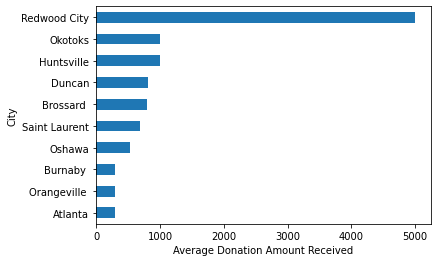

In [48]:
CityCountAvg = cityAmountAvg.sort_values(by="amount", ascending=False).head(10)
CityCountAvg["amount"].sort_values(ascending=True).plot.barh()
plt.ylabel("City")
plt.xlabel("Average Donation Amount Received")
plt.show()

In [49]:
# We can see Toronto has the most donation amount in total and average and are a lot larger compare to other cities. FBC might want to consider developing more donors
# in other cities as well. 
# The result for the demographics may due to different exposures to FBC, we are not sure what's the percentage of exposure FBC has to 
# different regions across canada.

### Donation Provinces

In [50]:
groupState = dfDonationsNoDup.groupby("billing_state")
DonorState = groupState.count()
DonorState.sort_values(by="donor_id", ascending=False)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
billing_state,,,,,,,,,,,,,,,
Ontario,263,263,263,263,263,262,9,263,263,263,263,149,259,117,262
ON,255,255,255,255,255,255,11,255,255,255,255,139,252,107,254
BC,121,121,121,121,121,121,7,121,121,121,121,70,121,36,120
AB,86,86,86,86,86,86,2,86,86,86,86,43,86,44,86
Alberta,80,80,80,80,80,80,1,80,80,80,80,45,80,32,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OR,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1
Ont,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Province,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


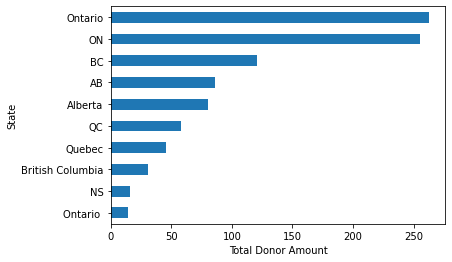

In [51]:
ProvinceCount = DonorState["type"].sort_values(ascending=False).head(10)
ProvinceCount.sort_values(ascending=True).plot.barh()
plt.ylabel("State")
plt.xlabel("Total Donor Amount")
plt.show()

In [52]:
ProvinceCount

billing_state
Ontario             263
ON                  255
BC                  121
AB                   86
Alberta              80
QC                   58
Quebec               46
British Columbia     31
NS                   16
Ontario              14
Name: type, dtype: int64

In [53]:
# The top 10 states ranked according to the total amount of donations received
stateAmountSum = dfDonations[['amount', 'billing_state']].groupby("billing_state").sum()
stateAmountSum.sort_values(by="amount", ascending=False).head(10)

,amount
billing_state,
Ontario,30718.80
ON,21991.34
BC,12446.25
Alberta,6392.23
AB,6058.30
CA,6025.00
Quebec,3968.00
QC,3950.50
British Columbia,2070.00


In [54]:
# We can see that Toronto has the highest number of donations among the billing cities and ON has the highest number of donations among the billing states, but we 
# cannot draw this conclusion yet. Because the format of the input data might not be consistent such as ON was inputted as Ontario/Ont, we need further data cleaning 
# when we dealing with specific questions regarding the billing states.

In [55]:
groupTag = dfDonationsNoDup.groupby("signup_tag_list")
DonorTag = groupTag.count()
DonorTag.sort_values(by="type", ascending=False)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email
signup_tag_list,,,,,,,,,,,,,,,
donor,1001,1001,1001,1001,1001,1001,19,1001,984,1001,1001,1001,529,1001,383
"donor,General Member,Ontario,Recruit Survey Apr 2020 Completed",13,13,13,13,13,13,1,13,13,13,13,13,11,13,7
"Alberta,donor,General Member,Recruit Survey Apr 2020 Completed,Youth Council Prospects",11,11,11,11,11,11,0,11,11,11,11,11,6,11,11
"Alberta,donor,General Member,Recruit Survey Apr 2020 Completed",10,10,10,10,10,10,0,10,10,10,10,10,7,10,7
"donor,General Member,Ontario,Recruit Survey Apr 2020 Completed,Youth Council Prospects",7,7,7,7,7,7,1,7,7,7,7,7,4,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Elder Prospects,General Member,Recruit Survey Apr 2020 Completed,Saskatchewan,Volunteer",1,1,1,1,1,1,0,1,1,1,1,1,0,0,1
"EN,FR,General Member,Membership fee,newsletter,Ontario,Paid Member",1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
"Covid Call RSVPs March 2020,defundpolicesurvey,donor,Elder Prospects,General Member,newsletter,Ontario,Paid Member,Recruit Survey Apr 2020 Completed,Sign-Up",1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [56]:
# We can look into the donor tags later when studying donor profiles.

## Donor Opt-in Status

In [57]:
# Donor opted-in status.
dfDonationsNoDupFill = dfDonationsNoDup.fillna({"recurring_donation_status":'One-Time', "signup_email_opt_in":'False', "signup_mobile_opt_in":'False'})
groupOpt = dfDonationsNoDupFill.groupby(["signup_email_opt_in","signup_mobile_opt_in"])
groupOpt.count()

type  ...  signup_tag_list
signup_email_opt_in signup_mobile_opt_in        ...                 
True                True                   661  ...              657
                    False                    8  ...                8
False               True                   508  ...              508
                    False                    3  ...                3

[4 rows x 14 columns]

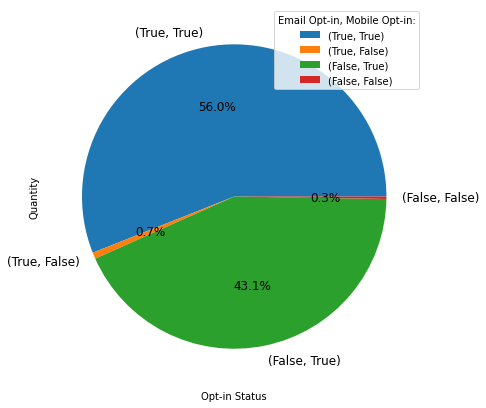

In [58]:
groupOpt.count()['type'].plot.pie(autopct="%.1f%%", figsize=(10,7), fontsize=12)
plt.xlabel("Opt-in Status")
plt.ylabel("Quantity")
plt.legend(title = "Email Opt-in, Mobile Opt-in:")
plt.show()

In [59]:
# Most of the donors have signed up for mobile opt in, does mobile opt in a better way to engage with donors? How well does mobile engagement perform in terms of
# the donation amount? We can look into this later.

In [60]:
EmailSum = dfDonationsNoDupFill[["signup_email_opt_in", "amount"]].groupby(["signup_email_opt_in"]).sum()
EmailSum

,amount
signup_email_opt_in,
True,63744.66
False,36791.77


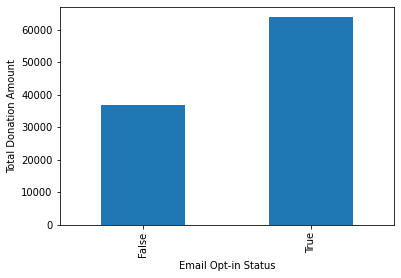

In [61]:
EmailSum["amount"].sort_values(ascending=True).plot.bar()
plt.ylabel("Total Donation Amount")
plt.xlabel("Email Opt-in Status")
plt.show()

In [62]:
EmailAvg = dfDonationsNoDupFill[["signup_email_opt_in", "amount"]].groupby(["signup_email_opt_in"]).mean()
EmailAvg

,amount
signup_email_opt_in,
True,95.283498
False,71.999550


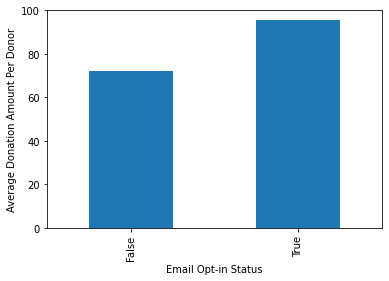

In [63]:
EmailAvg["amount"].sort_values(ascending=True).plot.bar()
plt.ylabel("Average Donation Amount Per Donor")
plt.xlabel("Email Opt-in Status")
plt.show()

In [64]:
MobileSum = dfDonationsNoDupFill[["signup_mobile_opt_in", "amount"]].groupby(["signup_mobile_opt_in"]).sum()
MobileSum

,amount
signup_mobile_opt_in,
True,100061.43
False,475.00


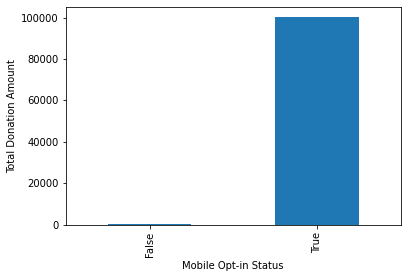

In [65]:
MobileSum["amount"].sort_values(ascending=True).plot.bar()
plt.ylabel("Total Donation Amount")
plt.xlabel("Mobile Opt-in Status")
plt.show()

In [66]:
MobileAvg = dfDonationsNoDupFill[["signup_mobile_opt_in", "amount"]].groupby(["signup_mobile_opt_in"]).mean()
MobileAvg

,amount
signup_mobile_opt_in,
True,85.595749
False,43.181818


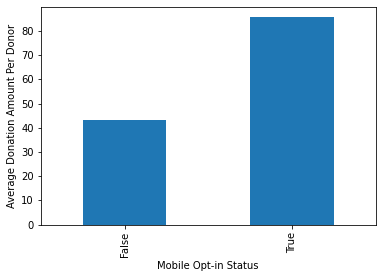

In [67]:
MobileAvg["amount"].sort_values(ascending=True).plot.bar()
plt.ylabel("Average Donation Amount Per Donor")
plt.xlabel("Mobile Opt-in Status")
plt.show()

### Cross-Table

In [68]:
dfCrossTable = dfDonationsNoDupFill[["signup_email_opt_in", "signup_mobile_opt_in"]]
dfCrossTable.describe()

,signup_email_opt_in,signup_mobile_opt_in
count,1180,1180
unique,2,2
top,True,True
freq,669,1169


In [69]:
a = dfCrossTable["signup_email_opt_in"] == True
b = dfCrossTable["signup_mobile_opt_in"] == True
dfDonorFreq = pd.crosstab(a,b)
dfDonorFreq

signup_mobile_opt_in,False,True
signup_email_opt_in,,
False,3,508
True,8,661


In [70]:
# Almost every donor chose to have mobile-opt-in.
# Out of a total 1180 unique donors, 1169 donors choose to have mobile opt-in
# Only 11 donors do not have mobile-opt-in

# Meanwhile, email-opt-in is a much more mixed among the donations
# 511 donors do not have email-opt-in
# 669 donors have email-opt-in

# 661 donors have both
# 508 only mobile
# 8 only email
# 3 neither

### Opt-In Status and Donation Frequency

In [71]:
dfDonations.columns

Index(['type', 'amount', 'payment_type_name', 'donor_id', 'donation_date',
       'donation_type', 'recurring_donation_status', 'billing_city',
       'billing_state', 'billing_FSA', 'billing_country',
       'billing_country_code', 'signup_email_opt_in', 'signup_mobile_opt_in',
       'signup_point_person_name_or_email', 'signup_tag_list'],
      dtype='object')

In [72]:
dfDonationFrequency = dfDonations[["signup_mobile_opt_in", "signup_email_opt_in"]]
dfDonationFrequency = dfDonationFrequency.fillna({"signup_email_opt_in":'False', "signup_mobile_opt_in":'False'})
dfDonationFrequency.describe()

,signup_mobile_opt_in,signup_email_opt_in
count,1594,1594
unique,2,2
top,True,True
freq,1583,1026


In [73]:
x = dfDonationFrequency["signup_email_opt_in"] == True
y = dfDonationFrequency["signup_mobile_opt_in"] == True
dfDonationFreq = pd.crosstab(x,y)
dfDonationFreq

signup_mobile_opt_in,False,True
signup_email_opt_in,,
False,3,565
True,8,1018


In [74]:
# Ratio of amount of donations to the amount of donors for each opt-in status
dfDonationFreq/dfDonorFreq

signup_mobile_opt_in,False,True
signup_email_opt_in,,
False,1.0,1.112205
True,1.0,1.540091


### Opt-In Findings



In [75]:
# From the opt-in status analysis, we have come to a couple conclusions
# First, we discovered that the total donation amount for both email-opt-in and 
# mobile-opt-in are higher when the donors have opted in.
# For donors with email-opt-in, the total donation amounted to $63,744.66
# without email-opt-in, the total donation amounted to $36,791.77
# The average donation amount with email-opt-in is $95.28
# The average without email-opt-in is $71.99

# For donors with mobile-opt-in, the total donation amounted to $100,061.43
# without mobile-opt-in, the total donation amounted to $475
# The average donation amount with mobile-opt-in is $85.60
# The average without mobile-opt-in is $43.18

# From looking at the raw donation amounts and averages, we can see that
# donors who have opted for mobile-opt-in on average donate more, and 
# have a higher donation total

# In cell 73, we can see the ratio of the number of donations to the number of donors
# categorized by the opt-in status they choose to have.
# For donors who have both email and mobile opt-in, the ratio of donations to donors is 1.54
# For donors who have only mobile but not email, the ratio is 1.11
# All other categories have a 1-to-1 donation to donor ratio.
# This shows that donors who are subscribed to both email and mobile
# donate more frequently on average

# From a managerial perspective, the FBC can make use of this knowledge to plan how they
# wish to promote the organisation with respect to the notification opt-in status.
# While both opt-in options seem to increase the donation amounts, on average and in whole,
# mobile-opt-in seems to have a better effect among donors. 
# There could be many reasons why FBC's clientele are more responsive with mobile.
# This should be one of the main goals, taking a look into the donor profiles with
# the objective of not donation amounts, but specifically mobile usage.
# Having this question answered, FBC could continue and improve the ways they 
# communicate through mobile. As well as discovering ways to increase mobile
# opt-in statuses.


## Donation Timing

In [76]:
# Donation in different months.
dfDonations['donation_month_year'] = pd.to_datetime(dfDonations['donation_date']).dt.to_period('M')
dfDonations.head(5)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list,donation_month_year
nationbuilder_id,,,,,,,,,,,,,,,,,
1,Donation,125.0,Credit Card,541,1/8/2020 12:41,NaN,NaN,Markham,Ontario,L3P,Canada,CA,True,True,Chris Thompson,"Black Fund Signatory,defundpolicesurvey,Genera...",2020-01
10,Donation,25.0,Credit Card,5509,5/11/2020 22:10,annual_membership_fee,NaN,St-Hubert,Quebec,J4T,Canada,CA,True,True,NaN,"FR,General Member,newsletter,Ontario,Paid Memb...",2020-05
100,Donation,15.0,Credit Card,6039,6/1/2020 16:53,general_donation,NaN,Ottawa,Ontario,K1G,Canada,CA,NaN,True,Chris Thompson,donor,2020-06
1000,Donation,15.0,Credit Card,7233,6/11/2020 17:30,general_donation,NaN,Orillia,ON,L3V,Canada,CA,NaN,True,NaN,"donor,Elder Prospects,General Member,Non - bla...",2020-06
1001,Donation,100.0,Credit Card,7234,6/11/2020 17:38,general_donation,NaN,Mississauga,Ontario,L5G,Canada,CA,True,True,NaN,donor,2020-06


In [77]:
groupDate = dfDonations.groupby("donation_month_year")
DonationDate = groupDate.count()
DonationDate.sort_values(by="donor_id", ascending=False)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
donation_month_year,,,,,,,,,,,,,,,,
2020-06,1024,1024,1024,1024,1024,1024,34,1024,1005,1024,1024,1024,561,1018,406,1020
2020-07,77,77,77,77,77,77,35,77,76,77,77,77,55,77,5,73
2020-05,67,67,67,67,67,67,5,67,66,67,67,67,46,66,57,67
2020-08,51,51,51,51,51,51,35,51,50,51,51,51,37,50,7,48
2020-09,44,44,44,44,44,44,34,44,42,44,44,44,36,44,5,41
2020-12,42,42,42,42,42,42,33,42,41,42,42,42,37,42,7,41
2020-10,41,41,41,41,41,41,33,41,39,41,41,41,36,41,5,39
2020-11,41,41,41,41,41,41,34,41,40,41,41,41,35,40,5,39
2021-01,39,39,39,39,39,39,31,39,37,39,39,39,34,38,7,39


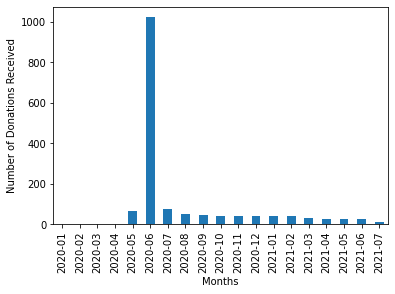

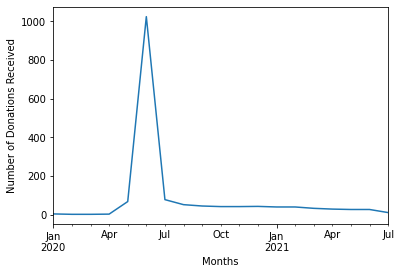

In [78]:
DonationDate["type"].plot.bar() 
plt.xlabel("Months")
plt.ylabel("Number of Donations Received")
plt.show()

DonationDate["type"].plot.line() 
plt.xlabel("Months")
plt.ylabel("Number of Donations Received")
plt.show()

In [79]:
groupDate["amount"].describe()

,count,mean,std,min,25%,50%,75%,max
donation_month_year,,,,,,,,
2020-01,3.0,66.666667,52.041650,25.0,37.5,50.00,87.50,125.0
2020-02,1.0,25.000000,NaN,25.0,25.0,25.00,25.00,25.0
2020-03,1.0,25.000000,NaN,25.0,25.0,25.00,25.00,25.0
2020-04,2.0,25.000000,0.000000,25.0,25.0,25.00,25.00,25.0
2020-05,67.0,46.507463,38.344283,5.0,25.0,25.00,50.00,250.0
2020-06,1024.0,74.444365,186.813261,0.5,25.0,40.00,75.35,3500.0
2020-07,77.0,119.263766,333.906767,3.0,15.0,25.00,50.00,2000.0
2020-08,51.0,43.670392,71.284340,3.0,10.0,25.00,27.50,400.0
2020-09,44.0,54.159091,147.742539,3.0,10.0,25.00,25.00,980.0


In [80]:
MonthlyAmt = groupDate["amount"].sum()
MonthlyAmt

donation_month_year
2020-01      200.00
2020-02       25.00
2020-03       25.00
2020-04       50.00
2020-05     3116.00
2020-06    76231.03
2020-07     9183.31
2020-08     2227.19
2020-09     2383.00
2020-10     1688.00
2020-11     1315.00
2020-12     3429.50
2021-01     1073.00
2021-02     6855.00
2021-03     1178.00
2021-04      542.50
2021-05      683.00
2021-06      558.00
2021-07      238.00
Freq: M, Name: amount, dtype: float64

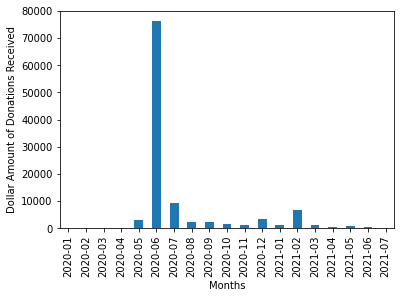

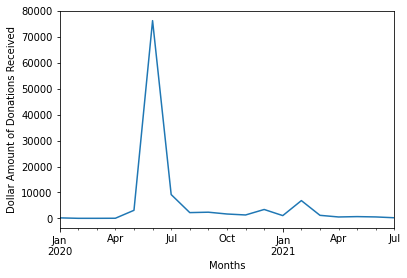

In [81]:
MonthlyAmt.plot.bar() 
plt.xlabel("Months")
plt.ylabel("Dollar Amount of Donations Received")
plt.show()

MonthlyAmt.plot.line() 
plt.xlabel("Months")
plt.ylabel("Dollar Amount of Donations Received")
plt.show()

In [82]:
# What we can spot is in July 2020, the number of donations we received are significantly higher than other months and the dollar amount of donations are 
# significantly higher as well. We need to investigate how the occurance of certain social events impact the number of donation we received. How we can attract 
# more one-time donors through these events and to convert those one-time donors into recurring ones later on. We can also notice that although some of the months
# has received similar numbers of donations but the dollar amount received in those months varies.

## Correlations

In [83]:
# Are there any sign up factors that can predict a high donation amount?
# From the data, a donor's donation type, recurring status, and opt-in status are recorded.
# This section will investigate the relationship between these factors and the value of a donation.
# We will look to assign a coefficient value for the factors, and look to create a elementary prediction model for donation values.

In [84]:
dfFactors = dfDonations[['amount', 'donation_type', 'recurring_donation_status', 'signup_email_opt_in', 'signup_mobile_opt_in']]
dfFactors

,amount,donation_type,recurring_donation_status,signup_email_opt_in,signup_mobile_opt_in
nationbuilder_id,,,,,
1,125.00,NaN,NaN,True,True
10,25.00,annual_membership_fee,NaN,True,True
100,15.00,general_donation,NaN,NaN,True
1000,15.00,general_donation,NaN,NaN,True
1001,100.00,general_donation,NaN,True,True
...,...,...,...,...,...
995,25.00,annual_membership_fee,NaN,True,True
996,74.15,general_donation,NaN,NaN,True
997,500.00,general_donation,NaN,True,True


In [85]:
# We notice that all donation categorised as “annual_membership_fee" are $25
# The annual membership fees for everyone is $25, with the exception of one person
# The membership fees are likely set in stone and not subject to change from the factors we are analyzing
# Thus we can remove these entries from the dataframe to increase accuracy of our model

dfFactors[(dfFactors["donation_type"] == "annual_membership_fee")]

,amount,donation_type,recurring_donation_status,signup_email_opt_in,signup_mobile_opt_in
nationbuilder_id,,,,,
10,25.0,annual_membership_fee,NaN,True,True
1006,25.0,annual_membership_fee,canceled,True,True
1062,25.0,annual_membership_fee,NaN,True,True
1081,25.0,annual_membership_fee,NaN,True,True
1082,25.0,annual_membership_fee,NaN,True,True
11,25.0,annual_membership_fee,NaN,True,NaN
1174,25.0,annual_membership_fee,canceled,True,True
12,25.0,annual_membership_fee,NaN,True,True
1244,25.0,annual_membership_fee,canceled,True,True


In [86]:
dfFactors = dfFactors[(dfFactors["donation_type"] != "annual_membership_fee")]
dfFactors["donation_type"].unique()

array([nan, 'general_donation'], dtype=object)

In [87]:
dfFactors[(dfFactors["donation_type"].isna())]

,amount,donation_type,recurring_donation_status,signup_email_opt_in,signup_mobile_opt_in
nationbuilder_id,,,,,
1,125.0,NaN,NaN,True,True


In [88]:
# There is one entry where the donation type is no categorized as either annual membership fee
# nor general donation
# We will be removing this from the analysis and only look at general donation 
# for both simplicity and as to not skew the analysis

dfFactors[(dfFactors["donation_type"].isna())]
dfFactors = dfFactors[(dfFactors["donation_type"] == "general_donation")]
dfFactors.describe()

,amount
count,1566.000000
mean,70.290888
std,217.492057
min,0.500000
25%,25.000000
50%,25.000000
75%,50.000000
max,5000.000000


In [89]:
dfFactors[(dfFactors["recurring_donation_status"].isna())]

,amount,donation_type,recurring_donation_status,signup_email_opt_in,signup_mobile_opt_in
nationbuilder_id,,,,,
100,15.00,general_donation,NaN,NaN,True
1000,15.00,general_donation,NaN,NaN,True
1001,100.00,general_donation,NaN,True,True
1002,1000.00,general_donation,NaN,NaN,True
1003,25.00,general_donation,NaN,True,True
...,...,...,...,...,...
994,100.00,general_donation,NaN,True,True
996,74.15,general_donation,NaN,NaN,True
997,500.00,general_donation,NaN,True,True


In [90]:
# dfFactors isolates the donation amount and the factors that we are taking a look at.
# Below, we have converted the factors, that contain a variety of values into a binary status
# For factors that are "true" and "false", such as "signup_email_opt_in", we can easily attribute a binary 1 or 0 to true or false
# For factors with more than one unique value, such as recurring donation status and donation type, we have created a new column that will 
# specifically look at the status of one unique value in the column.

# All columns have been checked and corrected for the proper unqiue values
dfFactors.loc[:, 'isEmailOptIn'] = np.where(dfFactors['signup_email_opt_in'] == True, 1, 0)
dfFactors.loc[:, 'isMobileOptIn'] = np.where(dfFactors['signup_mobile_opt_in'] == True, 1, 0)

In [91]:
# Seperating the donation into three categories between
# recurring donor status
# canceled but previously recurring donors
# donors who are not and never were recurring

# This will allow us to better understand which factors are important 
# between donors who have recurring status or not
dfFactorsRec = dfFactors[["amount", "isEmailOptIn", "isMobileOptIn"]][(dfFactors["recurring_donation_status"] == "active")]
dfFactorsCan = dfFactors[["amount", "isEmailOptIn", "isMobileOptIn"]][(dfFactors["recurring_donation_status"] == "canceled")]
dfFactorsNonRec = dfFactors[["amount", "isEmailOptIn", "isMobileOptIn"]][(dfFactors["recurring_donation_status"].isna())]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


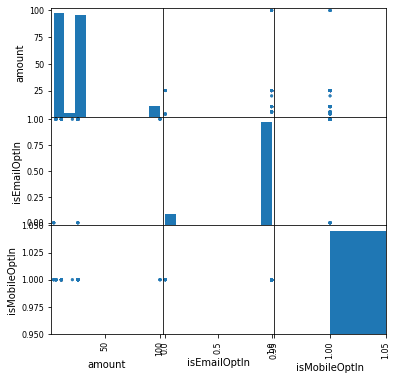

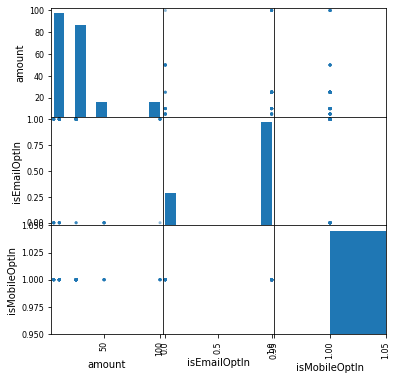

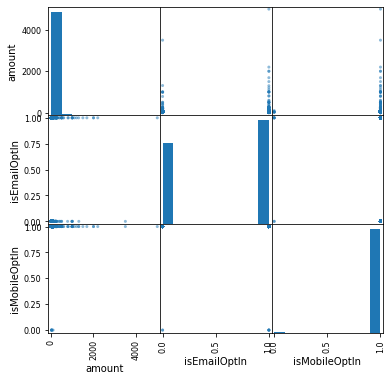

In [92]:
pd.plotting.scatter_matrix(dfFactorsRec, figsize=(6,6))
pd.plotting.scatter_matrix(dfFactorsCan, figsize=(6,6))
pd.plotting.scatter_matrix(dfFactorsNonRec, figsize=(6,6))
plt.show()

In [93]:
dfCorrelationRec = dfFactorsRec.corr('kendall')
dfCorrelationRec

,amount,isEmailOptIn,isMobileOptIn
amount,1.000000,0.158706,NaN
isEmailOptIn,0.158706,1.000000,NaN
isMobileOptIn,NaN,NaN,1.0


In [94]:
dfCorrelationCan = dfFactorsCan.corr('kendall')
dfCorrelationCan

,amount,isEmailOptIn,isMobileOptIn
amount,1.000000,0.081931,NaN
isEmailOptIn,0.081931,1.000000,NaN
isMobileOptIn,NaN,NaN,1.0


In [95]:
dfCorrelationNonRec = dfFactorsNonRec.corr('kendall')
dfCorrelationNonRec

,amount,isEmailOptIn,isMobileOptIn
amount,1.000000,0.054689,0.008752
isEmailOptIn,0.054689,1.000000,-0.024108
isMobileOptIn,0.008752,-0.024108,1.000000


In [96]:
# From the correlation tables, we see that mobile-opt-in is not a factor
# for consideration when talking about recurring or canceled donors
# There is however a positive correlation between donors who have email-opt-in and the donation amount they give

# For non-recurring donors, it is shown that the is a small but positive correlation between mobile-opt-in and donation amount
# as well as email-opt-in and donation amount.
# Surprsingly, there is a small negative correlation among non-recurring donors between email and mobile opt-in status
# This means that there is a trend among the non-recurring population of having either mobile or email, but not both.

### Recurring Donation Linear Regression

In [97]:
# Variables involved for prediction
dfX = dfFactorsRec[['isEmailOptIn', 'isMobileOptIn']]

# Variable to predict
dfY = dfFactorsRec['amount']

# Break the data
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.4, random_state=0)

# Create linear regression object
linearRegression = LinearRegression()

# Fit data
linearRegression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
# Print the intercepts
linearRegression.intercept_

11.799999999999997

In [99]:
# Coefficients
linearRegression.coef_

array([9.01168831, 0.        ])

In [100]:
# Table with coefficients
pd.DataFrame(linearRegression.coef_, dfX.columns, ['Regression Coeffs'])

,Regression Coeffs
isEmailOptIn,9.011688
isMobileOptIn,0.000000


In [101]:
# Prediction table
Y_predicted = linearRegression.predict(X_test)
Y_predicted

array([20.81168831, 20.81168831, 20.81168831, 20.81168831, 20.81168831,
       20.81168831, 20.81168831, 20.81168831, 20.81168831, 20.81168831,
       20.81168831, 20.81168831, 11.8       , 11.8       , 20.81168831,
       20.81168831, 11.8       , 20.81168831, 20.81168831, 20.81168831,
       11.8       , 20.81168831, 11.8       , 20.81168831, 20.81168831,
       20.81168831, 20.81168831, 20.81168831, 20.81168831, 20.81168831,
       11.8       , 20.81168831, 20.81168831, 11.8       , 20.81168831,
       20.81168831, 20.81168831, 20.81168831, 20.81168831, 20.81168831,
       20.81168831, 20.81168831, 20.81168831, 11.8       , 11.8       ,
       20.81168831, 20.81168831, 20.81168831, 20.81168831, 20.81168831,
       11.8       , 20.81168831, 20.81168831, 20.81168831, 11.8       ,
       20.81168831, 20.81168831, 20.81168831, 20.81168831, 20.81168831,
       20.81168831, 20.81168831, 20.81168831, 20.81168831, 20.81168831,
       20.81168831, 20.81168831, 20.81168831, 20.81168831, 20.81

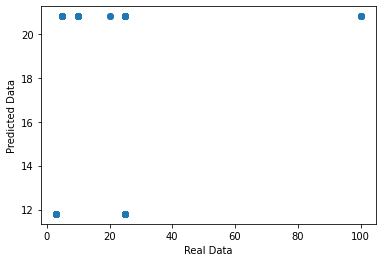

In [102]:
# Scatter plot for predicted and real values
plt.scatter(Y_test, Y_predicted)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')

plt.show()

In [103]:
# Due to the fact that mobile-opt in has no correlation with the donation amount, the model
# essentailly is a binary predictor with whether or not the donor has email opt-in
# It attributes a coefficient of 9.01 with email-opt-in
# Meaning any donation amount that has an email-opt-in is 9.01 times higher than without

In [104]:
# Accuracy
linearRegression.score(X_test, Y_test)

0.011978370810257877

### Canceled Donors Linear Regression

In [105]:
# Variables involved for prediction
dfX = dfFactorsCan[['isEmailOptIn', 'isMobileOptIn']]

# Variable to predict
dfY = dfFactorsCan['amount']

# Break the data
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.4, random_state=0)

# Create linear regression object
linearRegression = LinearRegression()

# Fit data
linearRegression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
# Print the intercepts
linearRegression.intercept_

22.272727272727273

In [107]:
# Coefficients
linearRegression.coef_

array([4.59167951, 0.        ])

In [108]:
# Table with coefficients
pd.DataFrame(linearRegression.coef_, dfX.columns, ['Regression Coeffs'])

,Regression Coeffs
isEmailOptIn,4.59168
isMobileOptIn,0.00000


In [109]:
# Prediction table
Y_predicted = linearRegression.predict(X_test)
Y_predicted

array([26.86440678, 22.27272727, 26.86440678, 26.86440678, 26.86440678,
       26.86440678, 26.86440678, 26.86440678, 26.86440678, 26.86440678,
       22.27272727, 26.86440678, 26.86440678, 22.27272727, 26.86440678,
       26.86440678, 26.86440678, 26.86440678, 22.27272727, 26.86440678,
       26.86440678, 26.86440678, 26.86440678, 26.86440678, 22.27272727,
       22.27272727, 26.86440678, 26.86440678, 26.86440678, 26.86440678,
       26.86440678, 22.27272727, 26.86440678, 26.86440678, 26.86440678,
       22.27272727, 26.86440678, 22.27272727, 26.86440678, 26.86440678,
       26.86440678, 26.86440678, 26.86440678, 26.86440678, 26.86440678,
       26.86440678, 26.86440678, 26.86440678, 26.86440678, 22.27272727,
       26.86440678, 26.86440678, 26.86440678, 26.86440678])

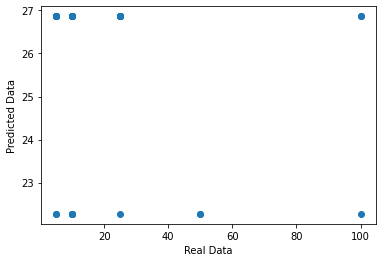

In [110]:
# Scatter plot for predicted and real values
plt.scatter(Y_test, Y_predicted)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')

plt.show()

In [111]:
# Similar to the recurring donations model,
# Due to the fact that mobile-opt in has no correlation with the donation amount, the model
# essentailly is a binary predictor with whether or not the donor has email opt-in
# It attributes a coefficient of 9.01 with email-opt-in
# Meaning any donation amount that has an email-opt-in is 9.01 times higher than without

In [112]:
# Accuracy
linearRegression.score(X_test, Y_test)

-0.0706808425080161

### Non_Recurring Donors Linear Regression

In [113]:
# Variables involved for prediction
dfX = dfFactorsNonRec[['isEmailOptIn', 'isMobileOptIn']]

# Variable to predict
dfY = dfFactorsNonRec['amount']

# Break the data
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.4, random_state=0)

# Create linear regression object
linearRegression = LinearRegression()

# Fit data
linearRegression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
# Print the intercepts
linearRegression.intercept_

4.576837192060083

In [115]:
# Coefficients
linearRegression.coef_

array([32.92316281, 79.14854497])

In [116]:
# Table with coefficients
pd.DataFrame(linearRegression.coef_, dfX.columns, ['Regression Coeffs'])

,Regression Coeffs
isEmailOptIn,32.923163
isMobileOptIn,79.148545


In [117]:
# Prediction table
Y_predicted = linearRegression.predict(X_test)
Y_predicted

array([116.64854497, 116.64854497,  83.72538217,  83.72538217,
       116.64854497, 116.64854497, 116.64854497,  83.72538217,
       116.64854497, 116.64854497,  83.72538217, 116.64854497,
       116.64854497,  83.72538217,  83.72538217, 116.64854497,
        83.72538217,  83.72538217, 116.64854497, 116.64854497,
       116.64854497, 116.64854497,  83.72538217,  83.72538217,
       116.64854497,  83.72538217,  83.72538217, 116.64854497,
       116.64854497,  83.72538217, 116.64854497,  83.72538217,
        37.5       ,  83.72538217,  83.72538217, 116.64854497,
       116.64854497, 116.64854497,  83.72538217, 116.64854497,
       116.64854497, 116.64854497,  83.72538217,  83.72538217,
       116.64854497, 116.64854497,  83.72538217,  83.72538217,
        83.72538217, 116.64854497, 116.64854497,  83.72538217,
        83.72538217, 116.64854497, 116.64854497,  83.72538217,
        83.72538217, 116.64854497, 116.64854497,  83.72538217,
       116.64854497,  83.72538217, 116.64854497,  83.72

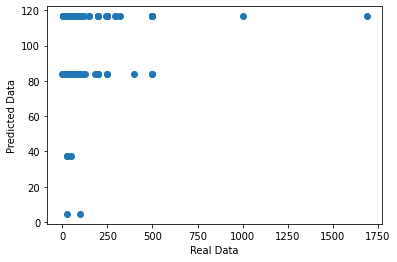

In [118]:
# Scatter plot for predicted and real values
plt.scatter(Y_test, Y_predicted)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')

plt.show()

In [119]:
# The linear model with the non-recurring donations has a correlation with both email and mobile opt-in factors
# The results predicted is visualized above. 
# The coefficients associated with this model has email-opt-in at 32.93
# and mobile-opt-in at 79.15

In [120]:
# Accuracy
linearRegression.score(X_test, Y_test)

-0.09215286394706945

### Linear Regression Conclusions

In [121]:
# The efficacy of a linear model is rather low is this senario
# There are limited factors that could be quantifiable, and even the quantifiable
# factors end up being discrete.
# In two of the models, one of the factors did not have a correlation at all with
# target factor, thus simplifying the linear model into a single factor model
# The accuracy for each model is rather low.

# The predictions, while within the range of the actual donation values, are rather 
# simplistic in variaety. We can see the same numbers being predicted over and over
# Although, the model does a good job of showing one trend. That is, non-recurring 
# donations are generally higher value than recurring donations, or donors who have canceled
# their recurring status. 

# One pattern emerged among the correlations
# For non-recurring donors, there is a small tendency to choose either email-opt-in
# or mobile-opt-in, not both. Perhaps management could make use of this fact to 
# further promote their relationship among non-recurring donors.
# By lowering or increasing the frequency of news, notifications, and updates
# while limiting the method of communication to whichever source the donors prefer.

# From a managerial standpoint, the use of a linear model is not feasible.
# There is little need to predict the donation amounts, when elementary analysis
# can already show the trends among donations.
# More complex models such as clustering or trees could draw more relationships
# between factors such as donation time.
# These will be explored further down the analysis.

# Correlation Opt-in & Value

## Email

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


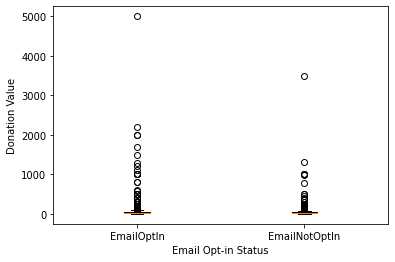

In [122]:
dfEmailOptIn = dfFactors[ (dfFactors["isEmailOptIn"] == 1) ]
dfEmailNotOptIn = dfFactors[ (dfFactors["isEmailOptIn"] == 0) ]
data = [dfEmailOptIn["amount"], dfEmailNotOptIn["amount"]]
plt.boxplot(data, labels=["EmailOptIn", "EmailNotOptIn"])
plt.xlabel("Email Opt-in Status")
plt.ylabel("Donation Value")
plt.show()

In [123]:
dfEmailOptIn.describe()

,amount,isEmailOptIn,isMobileOptIn
count,999.000000,999.0,999.000000
mean,72.136897,1.0,0.994995
std,234.168726,0.0,0.070604
min,0.500000,1.0,0.000000
25%,20.000000,1.0,1.000000
50%,25.000000,1.0,1.000000
75%,50.000000,1.0,1.000000
max,5000.000000,1.0,1.000000


In [124]:
dfEmailNotOptIn.describe()

,amount,isEmailOptIn,isMobileOptIn
count,567.000000,567.0,567.000000
mean,67.038395,0.0,0.996473
std,184.630993,0.0,0.059339
min,0.500000,0.0,0.000000
25%,25.000000,0.0,1.000000
50%,25.000000,0.0,1.000000
75%,50.000000,0.0,1.000000
max,3500.000000,0.0,1.000000


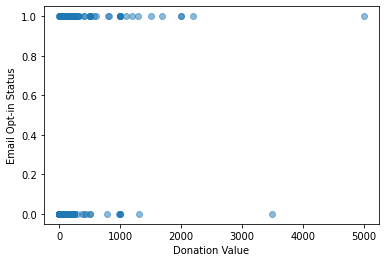

In [125]:
plt.scatter(dfFactors["amount"], dfFactors["isEmailOptIn"], alpha=0.5)
plt.xlabel("Donation Value")
plt.ylabel("Email Opt-in Status")
plt.show()

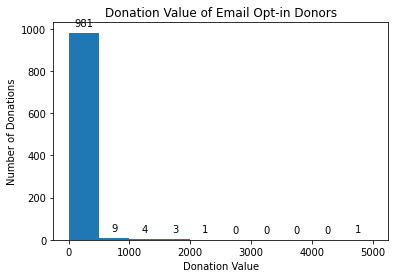

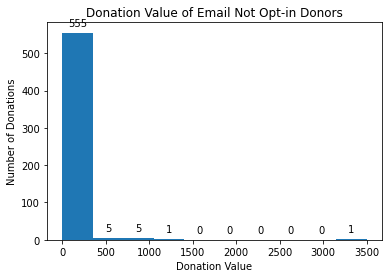

In [126]:
fig, ax = plt.subplots()
ax.hist(dfEmailOptIn["amount"], density=False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
plt.xlabel("Donation Value")
plt.ylabel("Number of Donations")
plt.title("Donation Value of Email Opt-in Donors")
plt.show()


fig, ax = plt.subplots()
ax.hist(dfEmailNotOptIn["amount"], density=False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
plt.xlabel("Donation Value")
plt.ylabel("Number of Donations")
plt.title("Donation Value of Email Not Opt-in Donors")
plt.show()

## Mobile

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


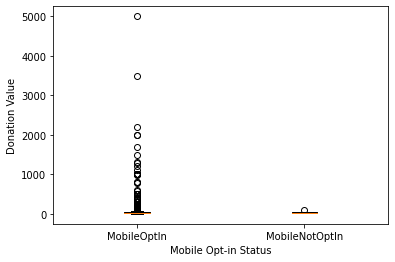

In [127]:
dfMobileOptIn = dfFactors[ (dfFactors["isMobileOptIn"] == 1) ]
dfMobileNotOptIn = dfFactors[ (dfFactors["isMobileOptIn"] == 0) ]
data = [dfMobileOptIn["amount"], dfMobileNotOptIn["amount"]]
plt.boxplot(data, labels=["MobileOptIn", "MobileNotOptIn"])
plt.xlabel("Mobile Opt-in Status")
plt.ylabel("Donation Value")
plt.show()

In [128]:
dfMobileOptIn.describe()

,amount,isEmailOptIn,isMobileOptIn
count,1559.000000,1559.000000,1559.0
mean,70.414067,0.637588,1.0
std,217.965472,0.480851,0.0
min,0.500000,0.000000,1.0
25%,25.000000,0.000000,1.0
50%,25.000000,1.000000,1.0
75%,50.000000,1.000000,1.0
max,5000.000000,1.000000,1.0


In [129]:
dfMobileNotOptIn.describe()

,amount,isEmailOptIn,isMobileOptIn
count,7.000000,7.000000,7.0
mean,42.857143,0.714286,0.0
std,27.817432,0.487950,0.0
min,25.000000,0.000000,0.0
25%,25.000000,0.500000,0.0
50%,25.000000,1.000000,0.0
75%,50.000000,1.000000,0.0
max,100.000000,1.000000,0.0


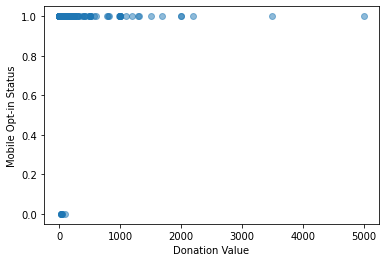

In [130]:
plt.scatter(dfFactors["amount"], dfFactors["isMobileOptIn"], alpha=0.5)
plt.xlabel("Donation Value")
plt.ylabel("Mobile Opt-in Status")
plt.show()

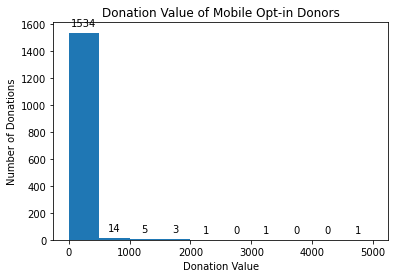

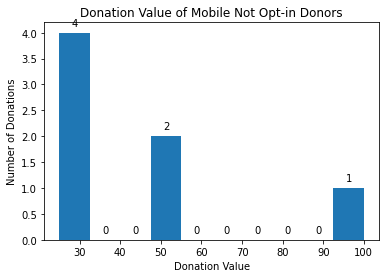

In [131]:
fig, ax = plt.subplots()
ax.hist(dfMobileOptIn["amount"], density=False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
plt.xlabel("Donation Value")
plt.ylabel("Number of Donations")
plt.title("Donation Value of Mobile Opt-in Donors")
plt.show()


fig, ax = plt.subplots()
ax.hist(dfMobileNotOptIn["amount"], density=False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
plt.xlabel("Donation Value")
plt.ylabel("Number of Donations")
plt.title("Donation Value of Mobile Not Opt-in Donors")
plt.show()

# Donation Tenure



In [132]:
dfDonationType = dfDonations["donation_type"]
dfDonationType.head(5)

nationbuilder_id
1                         NaN
10      annual_membership_fee
100          general_donation
1000         general_donation
1001         general_donation
Name: donation_type, dtype: object

In [133]:
dfAnnualDonation = dfDonations[ dfDonations["donation_type"] == 'annual_membership_fee']
dfAnnualDonation.head(5)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list,donation_month_year
nationbuilder_id,,,,,,,,,,,,,,,,,
10,Donation,25.0,Credit Card,5509,5/11/2020 22:10,annual_membership_fee,NaN,St-Hubert,Quebec,J4T,Canada,CA,True,True,NaN,"FR,General Member,newsletter,Ontario,Paid Memb...",2020-05
1006,Donation,25.0,Credit Card,5711,6/12/2020 2:48,annual_membership_fee,canceled,Laval,QC,H7G,Canada,CA,True,True,NaN,General Member,2020-06
1062,Donation,25.0,Credit Card,7368,6/16/2020 0:46,annual_membership_fee,NaN,Edmonton,AB,T5T,Canada,CA,True,True,NaN,General Member,2020-06
1081,Donation,25.0,Credit Card,7147,6/20/2020 0:12,annual_membership_fee,NaN,Vancouver,British Columbia,V5X,Canada,CA,True,True,Nana Boahen,"British Columbia,General Member,Recruit Survey...",2020-06
1082,Donation,25.0,Credit Card,7446,6/20/2020 16:56,annual_membership_fee,NaN,Burnaby,British Columbia,V3N,Canada,CA,True,True,Chris Thompson,"BC_Hub_Launch_RSVP,BC-IPT,BC-IPT info session ...",2020-06


In [134]:
dfAnnualDonation = dfAnnualDonation.groupby('donor_id')
dfAnnualDonation.head(5)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list,donation_month_year
nationbuilder_id,,,,,,,,,,,,,,,,,
10,Donation,25.0,Credit Card,5509,5/11/2020 22:10,annual_membership_fee,NaN,St-Hubert,Quebec,J4T,Canada,CA,True,True,NaN,"FR,General Member,newsletter,Ontario,Paid Memb...",2020-05
1006,Donation,25.0,Credit Card,5711,6/12/2020 2:48,annual_membership_fee,canceled,Laval,QC,H7G,Canada,CA,True,True,NaN,General Member,2020-06
1062,Donation,25.0,Credit Card,7368,6/16/2020 0:46,annual_membership_fee,NaN,Edmonton,AB,T5T,Canada,CA,True,True,NaN,General Member,2020-06
1081,Donation,25.0,Credit Card,7147,6/20/2020 0:12,annual_membership_fee,NaN,Vancouver,British Columbia,V5X,Canada,CA,True,True,Nana Boahen,"British Columbia,General Member,Recruit Survey...",2020-06
1082,Donation,25.0,Credit Card,7446,6/20/2020 16:56,annual_membership_fee,NaN,Burnaby,British Columbia,V3N,Canada,CA,True,True,Chris Thompson,"BC_Hub_Launch_RSVP,BC-IPT,BC-IPT info session ...",2020-06
11,Donation,25.0,Credit Card,5383,5/11/2020 23:17,annual_membership_fee,NaN,Montreal,QUEBEC,H4B,Canada,CA,True,NaN,NaN,"General Member,newsletter,Quebec,YC Call May 2...",2020-05
1174,Donation,25.0,Credit Card,5711,7/12/2020 2:48,annual_membership_fee,canceled,Laval,QC,H7G,Canada,CA,True,True,NaN,General Member,2020-07
12,Donation,25.0,Credit Card,5710,5/12/2020 1:14,annual_membership_fee,NaN,Montreal,Quebec,H1N,Canada,CA,True,True,NaN,"defundpolicesurvey,donor,General Member,Quebec...",2020-05
1244,Donation,25.0,Credit Card,5711,8/12/2020 2:48,annual_membership_fee,canceled,Laval,QC,H7G,Canada,CA,True,True,NaN,General Member,2020-08


# Clustering


In [135]:
mapping = {'donation_type': {'general_donation':0, 'annual_membership_fee':1}, 'billing_city':{}, 'billing_FSA':{}}
dfIndexed = dfDonations[['amount', 'donation_type', 'billing_city', 'billing_FSA', 'donation_date']]

cities = sorted(list(set(dfIndexed['billing_city'].values)))
for i, city in enumerate(cities):
  mapping['billing_city'][city] = i

fsas = dfIndexed['billing_FSA'].values
for fsa in fsas:
  num1 = ord(fsa[0])
  num2 = ord(fsa[1])
  num3 = ord(fsa[2])
  mapping['billing_FSA'][fsa] = num1 + num2 + num3

dfIndexed['donation_date'] = pd.to_datetime(dfDonations['donation_date']).astype(int)/ 10**9


dfIndexed = dfIndexed.replace(mapping)
dfIndexed = dfIndexed.dropna()

scaler = StandardScaler()
scaler.fit(dfIndexed)
dfIndexed.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,amount,donation_type,billing_city,billing_FSA,donation_date
nationbuilder_id,,,,,
10,25.0,1.0,275,210,1.589235e+09
100,15.0,0.0,207,195,1.591030e+09
1000,15.0,0.0,202,213,1.591897e+09
1001,100.0,0.0,171,200,1.591897e+09
1002,1000.0,0.0,33,225,1.591902e+09


## Amount vs Donation Date

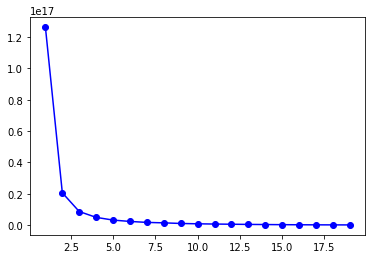

In [136]:
ks = []
distances = []
dfCurr = dfIndexed[['amount', 'donation_date']]
for k in range(1, 20):
  m = KMeans(n_clusters=k, random_state=1).fit(dfCurr)
  distances.append(m.inertia_)
  ks.append(k)

plt.plot(ks, distances, '-bo')


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Text(0, 0.5, 'donation amount($)')

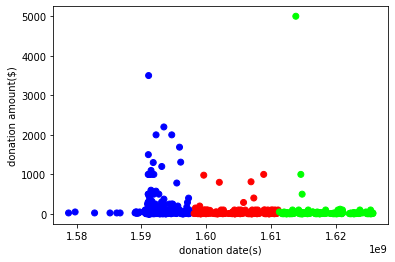

In [137]:
best_m = KMeans(n_clusters=3, random_state=1).fit(dfCurr)
dfCurr.loc[:, 'cluster'] = best_m.labels_
plt.scatter(dfCurr['donation_date'], dfCurr['amount'], c=dfCurr['cluster'], cmap='brg')
plt.xlabel('donation date(s)')
plt.ylabel('donation amount($)')

In [138]:
dfCurr.groupby('cluster').mean()

,amount,donation_date
cluster,,
0,74.544918,1.591688e+09
1,48.120853,1.604399e+09
2,60.860119,1.617833e+09


In [139]:
dfCurr.groupby('cluster').std()

,amount,donation_date
cluster,,
0,192.102238,1.462965e+06
1,126.904073,3.869536e+06
2,393.004312,4.218394e+06


In [140]:
dfCurr.groupby('cluster').max()

,amount,donation_date
cluster,,
0,3500.0,1.597959e+09
1,1000.0,1.611019e+09
2,5000.0,1.625614e+09


In [141]:
dfCurr.groupby('cluster').min()

,amount,donation_date
cluster,,
0,0.5,1.578775e+09
1,3.0,1.598100e+09
2,2.0,1.611216e+09


## Amount vs Billing FSA

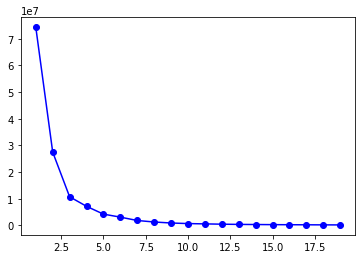

In [142]:
ks = []
distances = []
dfCurr = dfIndexed[['amount', 'billing_FSA']]
for k in range(1, 20):
  m = KMeans(n_clusters=k, random_state=1).fit(dfCurr)
  distances.append(m.inertia_)
  ks.append(k)

plt.plot(ks, distances, '-bo')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Text(0, 0.5, 'donation amount($)')

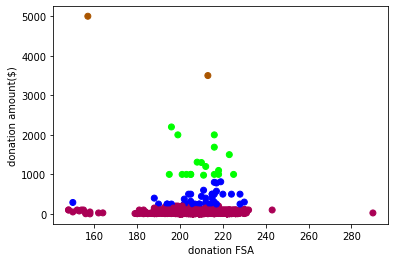

In [143]:
best_m = KMeans(n_clusters=4, random_state=1).fit(dfCurr)
dfCurr.loc[:, 'cluster'] = best_m.labels_
plt.scatter(dfCurr['billing_FSA'], dfCurr['amount'], c=dfCurr['cluster'], cmap='brg')
plt.xlabel('donation FSA')
plt.ylabel('donation amount($)')

In [144]:
dfCurr.groupby('cluster').mean()

,amount,billing_FSA
cluster,,
0,374.133256,208.651163
1,41.182575,206.635948
2,4250.000000,185.000000
3,1293.247778,209.833333


In [145]:
dfCurr.groupby('cluster').std()

,amount,billing_FSA
cluster,,
0,162.165014,13.246534
1,34.975909,12.036739
2,1060.660172,39.597980
3,409.632583,8.945916


In [146]:
dfCurr.groupby('cluster').max()

,amount,billing_FSA
cluster,,
0,813.5,230
1,200.0,290
2,5000.0,213
3,2200.0,225


In [147]:
dfCurr.groupby('cluster').min()

,amount,billing_FSA
cluster,,
0,242.14,150
1,0.50,148
2,3500.00,157
3,980.00,195
